# Customer segmentation

Customer segmentation is the process of dividing customers into groups based on common characteristics so companies can market to each group effectively and appropriately. 

In [3]:
import pandas as pd
df = pd.read_csv('data/data.csv')
df.head()

,Gender,Marital Status,Age,Education,Income,Occupation,Settlement Size
0,1,1,39,2,130568,1,2
1,0,0,29,1,80315,0,0
2,1,0,35,0,107067,0,0
3,0,1,56,2,214000,1,0
4,1,1,45,2,158138,1,2


### Exploratory data analysis

In [5]:
pd.set_option('display.float_format', '{:.2f}'.format)
print('\033[1m' + 'Table 1. Descriptive statistics' + '\033[0m')
df.describe()

Table 1. Descriptive statistics


,Gender,Marital Status,Age,Education,Income,Occupation,Settlement Size
count,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00
mean,0.60,0.50,40.82,1.46,137516.20,0.61,0.83
std,0.49,0.50,9.46,0.78,46184.30,0.67,0.97
min,0.00,0.00,20.00,0.00,35832.00,0.00,0.00
25%,0.00,0.00,33.00,1.00,101262.75,0.00,0.00
50%,1.00,1.00,40.00,1.00,133004.00,1.00,0.00
75%,1.00,1.00,48.00,2.00,171232.50,1.00,2.00
max,1.00,1.00,76.00,3.00,309364.00,2.00,2.00


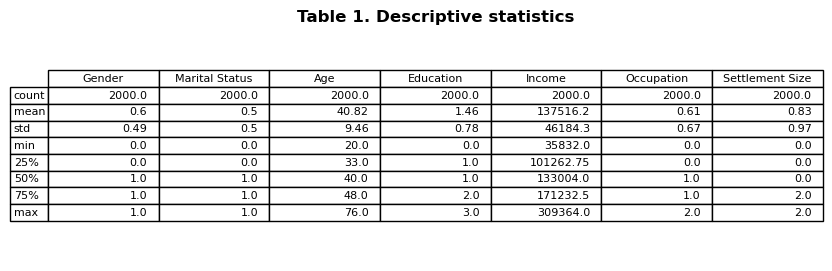

In [6]:
import matplotlib.pyplot as plt

pd.set_option('display.float_format', '{:.,.2f}'.format)
desc_stats = df.describe()

fig, ax = plt.subplots(figsize=(10, 3))
ax.axis('tight')
ax.axis('off')

ax.set_title("Table 1. Descriptive statistics", fontsize=12, fontweight='bold', loc='center')
table = ax.table(cellText=desc_stats.round(2).values, colLabels=desc_stats.columns, rowLabels=desc_stats.index, loc='center')

plt.savefig("Descriptive statistics.png", bbox_inches='tight', dpi=300)
plt.show()

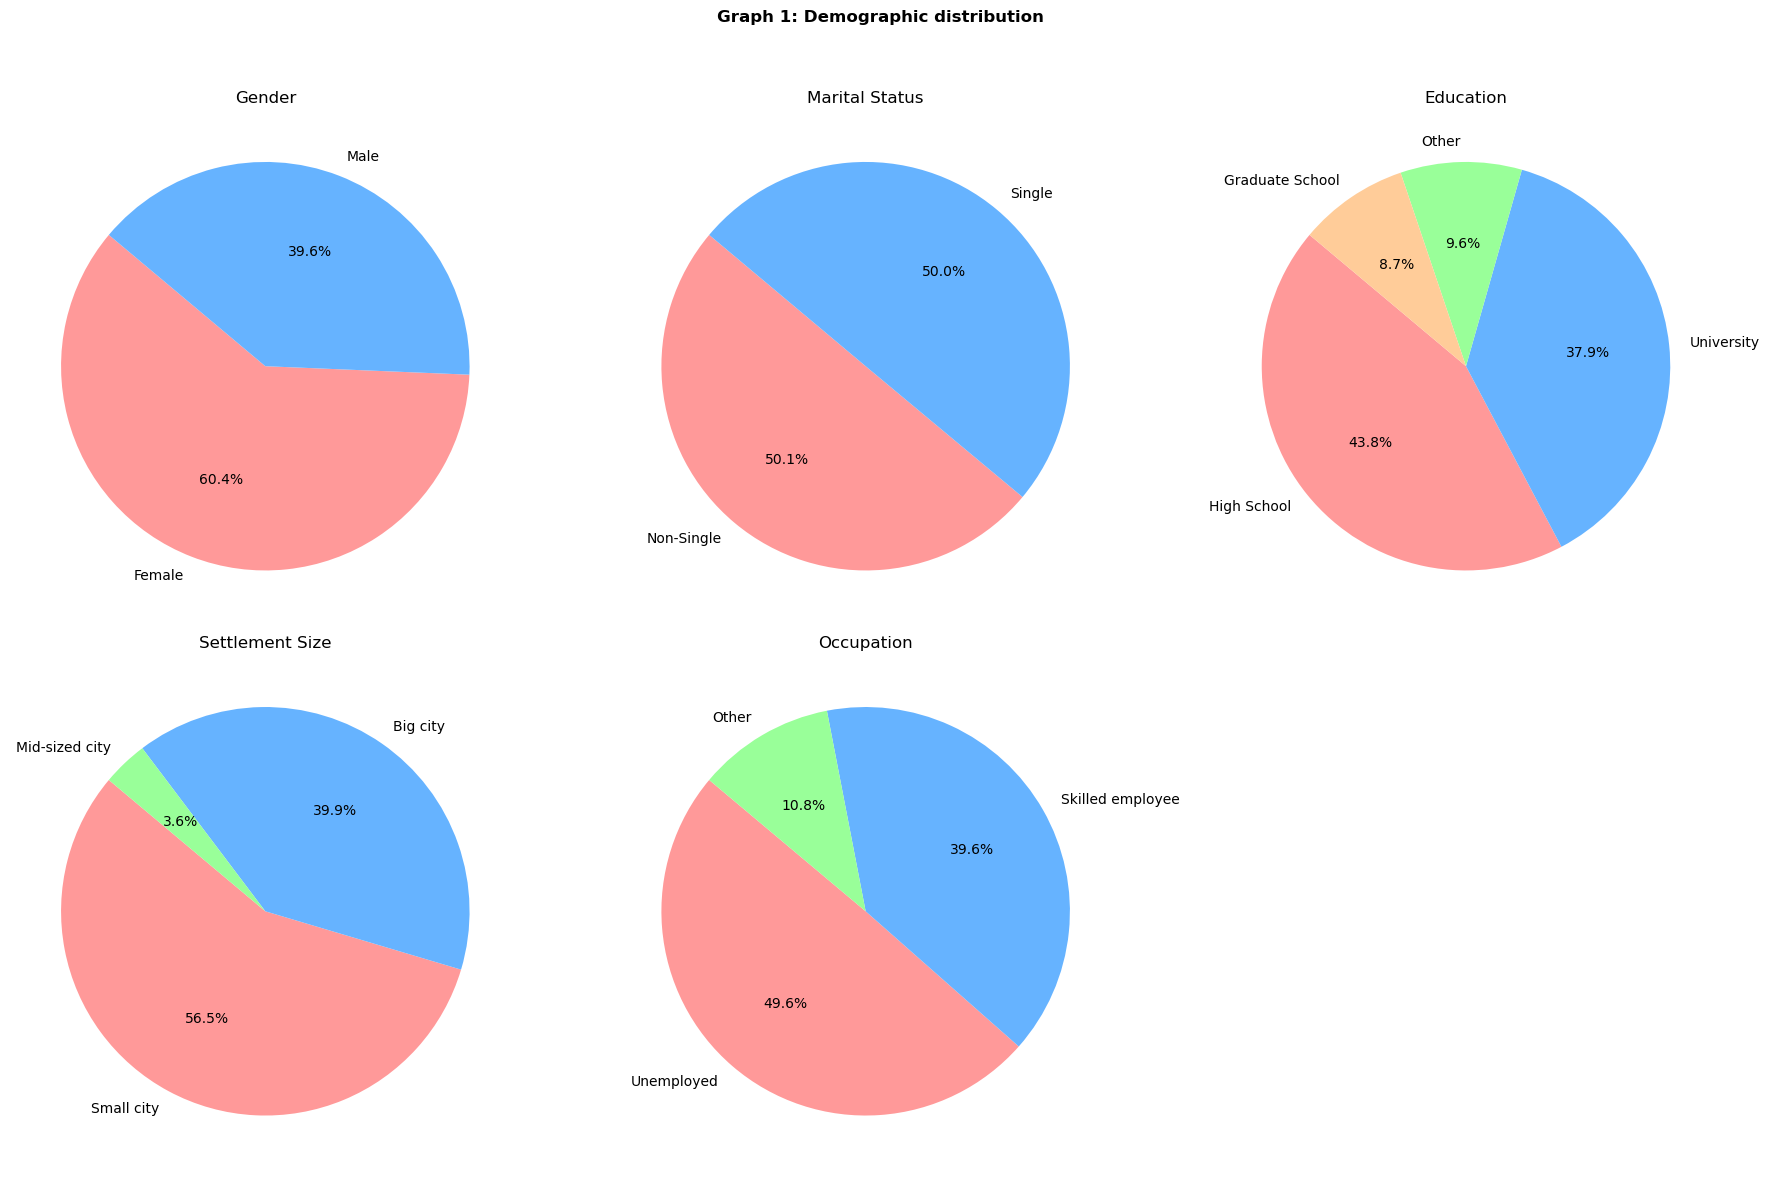

In [7]:
# Mapping categorical variables to labels
gender_mapping = {0: 'Male', 1: 'Female'}
marital_status_mapping = {0: 'Single', 1: 'Non-Single'}
education_mapping = {0: 'Other', 1: 'High School', 2: 'University', 3: 'Graduate School'}
settlement_size_mapping = {0: 'Small city', 1: 'Mid-sized city', 2: 'Big city'}
occupation_mapping = {0: 'Unemployed', 1: 'Skilled employee ', 2: 'Other'}

df_mapped = df.copy()

# Applying the mappings 
df_mapped['Gender'] = df_mapped['Gender'].map(gender_mapping)
df_mapped['Marital Status'] = df_mapped['Marital Status'].map(marital_status_mapping)
df_mapped['Education'] = df_mapped['Education'].map(education_mapping)
df_mapped['Settlement Size'] = df_mapped['Settlement Size'].map(settlement_size_mapping)
df_mapped['Occupation'] = df_mapped['Occupation'].map(occupation_mapping)

gender_total = df_mapped['Gender'].value_counts()
marriage_total = df_mapped['Marital Status'].value_counts()
education_total = df_mapped['Education'].value_counts()
settlement_total = df_mapped['Settlement Size'].value_counts()
occupation_total = df_mapped['Occupation'].value_counts()

fig, axes = plt.subplots(2, 3, figsize=(18, 12)) 
pie_colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6']

# Gender distribution pie chart
axes[0, 0].pie(gender_total, labels=gender_total.index, autopct='%1.1f%%', startangle=140, colors=pie_colors)
axes[0, 0].set_title('Gender')

# Marital status distribution pie chart
axes[0, 1].pie(marriage_total, labels=marriage_total.index, autopct='%1.1f%%', startangle=140, colors=pie_colors)
axes[0, 1].set_title('Marital Status')

# Education distribution pie chart
axes[0, 2].pie(education_total, labels=education_total.index, autopct='%1.1f%%', startangle=140, colors=pie_colors)
axes[0, 2].set_title('Education')

# Settlement size distribution pie chart
axes[1, 0].pie(settlement_total, labels=settlement_total.index, autopct='%1.1f%%', startangle=140, colors=pie_colors)
axes[1, 0].set_title('Settlement Size')

# Occupation distribution pie chart
axes[1, 1].pie(occupation_total, labels=occupation_total.index, autopct='%1.1f%%', startangle=140, colors=pie_colors)
axes[1, 1].set_title('Occupation')

axes[1, 2].axis('off')
fig.suptitle("Graph 1: Demographic distribution", fontsize=12, fontweight='bold', ha='center')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig("Demographic distribution.png", bbox_inches='tight', dpi=300)
plt.show()

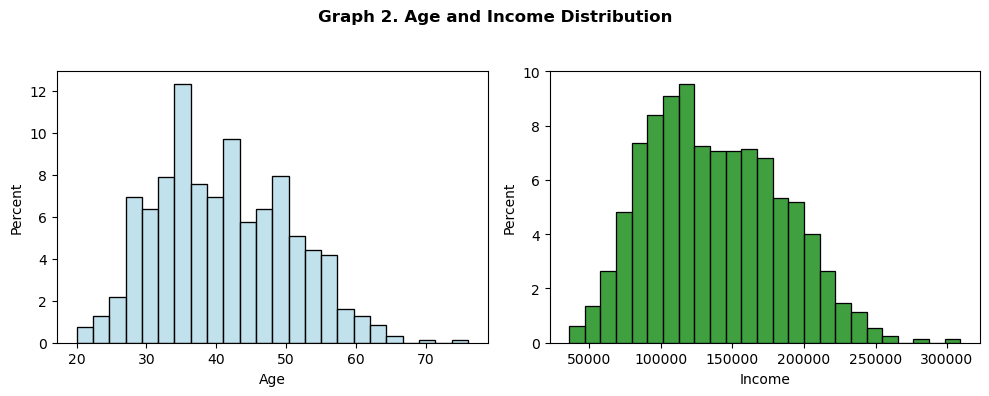

In [8]:
#Plotting histogram for numerical variables distribution:

import seaborn as sns
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))  

sns.histplot(data=df, x='Age', stat='percent', ax=axes[0], color='lightblue')  

sns.histplot(data=df, x='Income', stat='percent', ax=axes[1], color='green')  
plt.suptitle('Graph 2. Age and Income Distribution', fontsize=12, fontweight='bold')

plt.tight_layout(rect=[0, 0, 1, 0.95])  
plt.savefig("Age Income histogram.png", bbox_inches='tight', dpi=300)
plt.show()

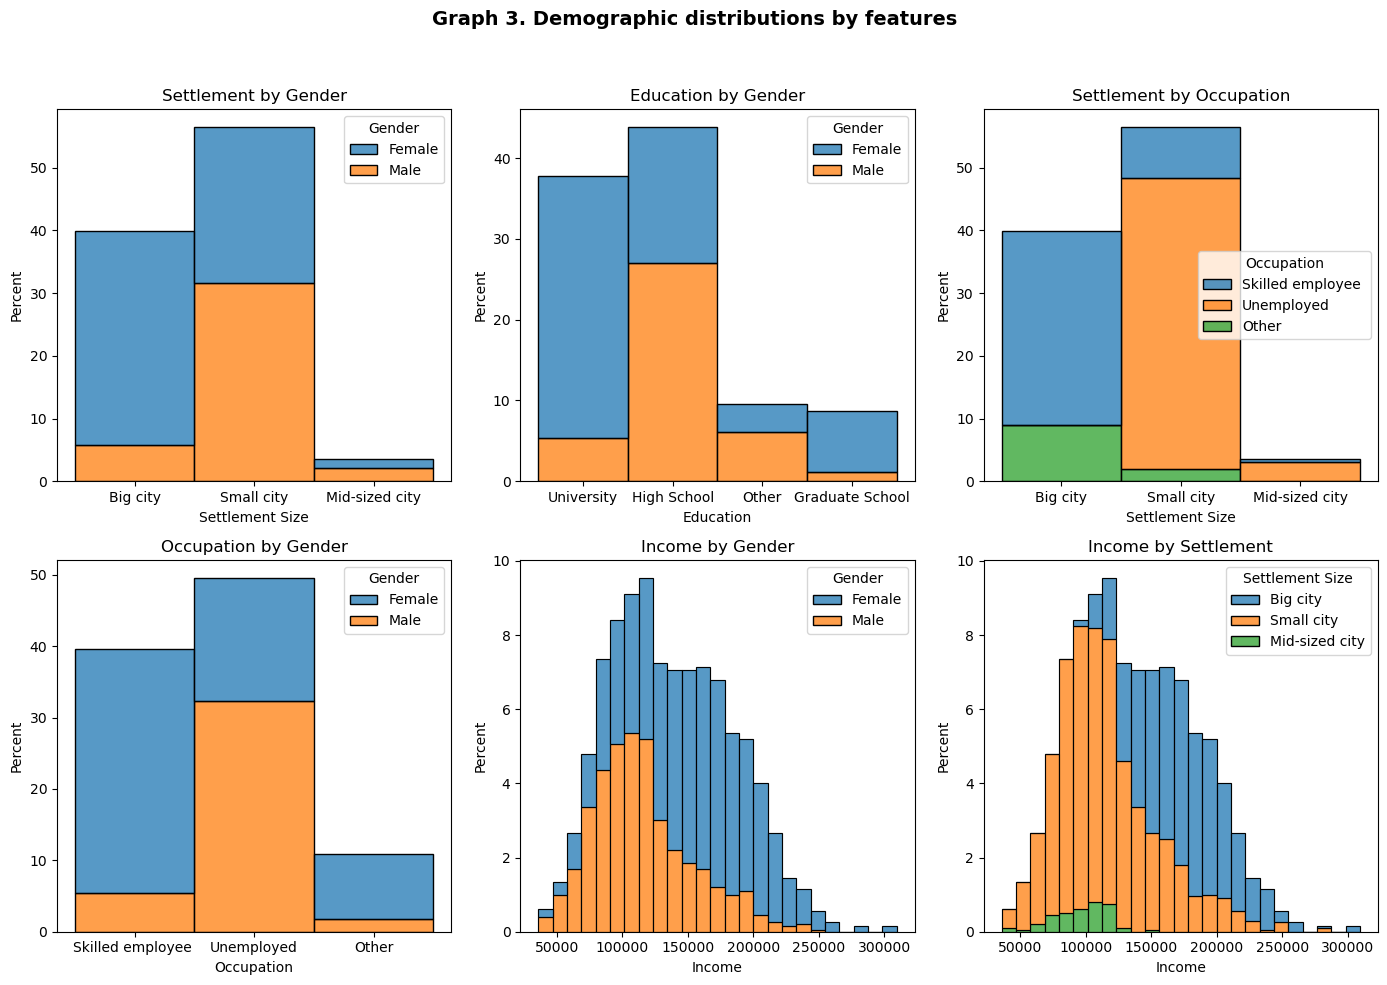

In [9]:
#Plotting histogram by features:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(14, 10))

sns.histplot(data=df_mapped, x='Settlement Size', hue='Gender', multiple='stack', stat='percent', ax=axes[0, 0])
axes[0, 0].set_title('Settlement by Gender')

sns.histplot(data=df_mapped, x='Education', hue='Gender', multiple='stack', stat='percent', ax=axes[0, 1])
axes[0, 1].set_title('Education by Gender')

sns.histplot(data=df_mapped, x='Settlement Size', hue='Occupation', multiple='stack', stat='percent', ax=axes[0, 2])
axes[0, 2].set_title('Settlement by Occupation')

sns.histplot(data=df_mapped, x='Occupation', hue='Gender', multiple='stack', stat='percent', ax=axes[1, 0])
axes[1, 0].set_title('Occupation by Gender')

sns.histplot(data=df_mapped, x='Income', hue='Gender', multiple='stack', stat='percent', ax=axes[1, 1])
axes[1, 1].set_title('Income by Gender')

sns.histplot(data=df_mapped, x='Income', hue='Settlement Size', multiple='stack', stat='percent', ax=axes[1, 2])
axes[1, 2].set_title('Income by Settlement')

fig.suptitle('Graph 3. Demographic distributions by features', fontsize=14, fontweight='bold' )

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig("Demographic features.png", bbox_inches='tight', dpi=300)
plt.show()


In [17]:
# Resetting the float format
from sklearn.preprocessing import StandardScaler
pd.reset_option('display.float_format')

# Standardizing the numerical variables
scaler = StandardScaler()
df1 = df.copy()
num_variables = ['Age', 'Income']
df1[num_variables] = scaler.fit_transform(df[num_variables])
print('\033[1m' + 'Table 2. Standardized dataset preview' + '\033[0m')
df1.head()

Table 2. Standardized dataset preview


,Gender,Marital Status,Age,Education,Income,Occupation,Settlement Size
0,1,1,-0.192892,2,-0.150483,1,2
1,0,0,-1.250703,1,-1.238852,0,0
2,1,0,-0.616016,0,-0.659462,0,0
3,0,1,1.605387,2,1.656471,1,0
4,1,1,0.441795,2,0.446623,1,2


### Identifying optimal number of clusters using Elbow method

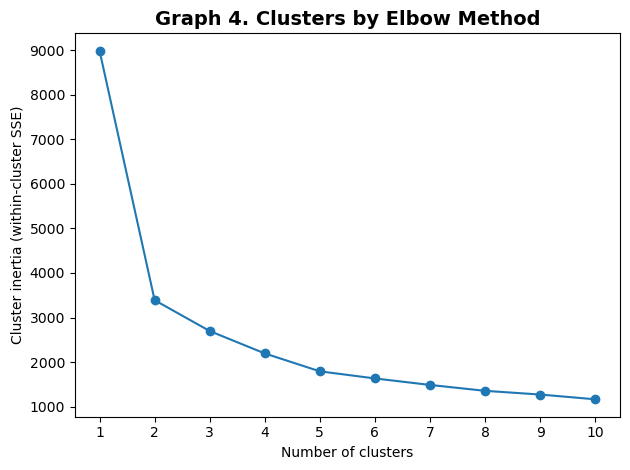

In [18]:
from sklearn.cluster import KMeans

inertias = []

for i in range(1, 11):
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=0)
    km.fit(df1)
    inertias.append(km.inertia_)

plt.plot(range(1, 11), inertias, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Cluster inertia (within-cluster SSE)')
plt.xticks(range(1,11))

plt.title('Graph 4. Clusters by Elbow Method', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig("Elbow.png", bbox_inches='tight', dpi=300)
plt.show()

### Identifying optimal number of clusters using Silhouette plot

In [19]:
#Silhouette plot for 4 clusters
import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples

km = KMeans(n_clusters=4,  
            init='k-means++', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0)

y_km = km.fit_predict(df1)
cluster_labels = np.unique(y_km)
print(cluster_labels)

n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(df1, y_km, metric='euclidean')
print('silhouette_vals\n', silhouette_vals)


[0 1 2 3]
silhouette_vals
 [0.57881238 0.67518753 0.56716517 ... 0.56330217 0.63007716 0.47079918]


silhouette_avg: 0.45


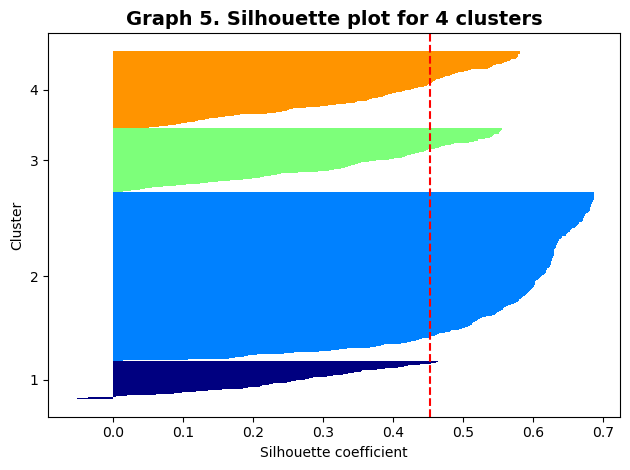

In [20]:
y_ax_lower, y_ax_upper = 0, 0
yticks = []

for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
    
silhouette_avg = np.mean(silhouette_vals)
print(f'silhouette_avg: {silhouette_avg:.2f}')

plt.axvline(silhouette_avg, color="red", linestyle="--") # plot vertical average line

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

plt.title('Graph 5. Silhouette plot for 4 clusters', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig("Silhouette_plot4.png", bbox_inches='tight', dpi=300)
plt.show()

In [21]:
#Silhouette plot for 3 clusters
km2 = KMeans(n_clusters=3,  
            init='k-means++', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0)

y_km2 = km2.fit_predict(df1)

cluster_labels = np.unique(y_km2)

n_clusters = cluster_labels.shape[0]

silhouette_vals = silhouette_samples(df1, y_km2, metric='euclidean')

silhouette_avg: 0.43


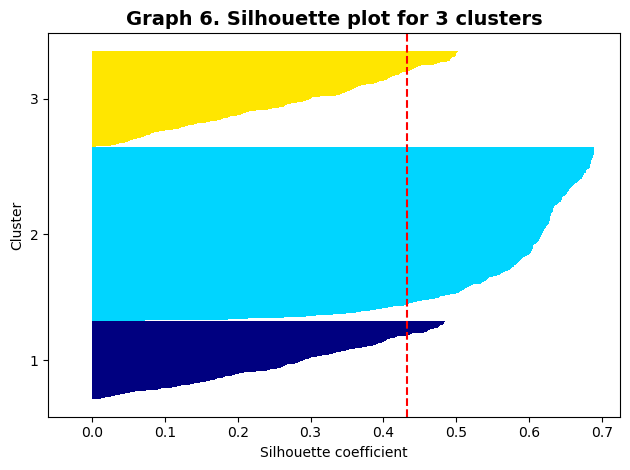

In [22]:
y_ax_lower, y_ax_upper = 0, 0
yticks = []

for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km2 == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
    
silhouette_avg = np.mean(silhouette_vals)
print(f'silhouette_avg: {silhouette_avg:.2f}')

plt.axvline(silhouette_avg, color="red", linestyle="--") # plot vertical average line

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

plt.title('Graph 6. Silhouette plot for 3 clusters', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig("Silhouette_plot3.png", bbox_inches='tight', dpi=300)
plt.show()

In [23]:
#Silhouette plot for 2 clusters
km3 = KMeans(n_clusters=2,  
            init='k-means++', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0)

y_km3 = km3.fit_predict(df1)

cluster_labels = np.unique(y_km3)

n_clusters = cluster_labels.shape[0]

silhouette_vals = silhouette_samples(df1, y_km3, metric='euclidean')

silhouette_avg: 0.54


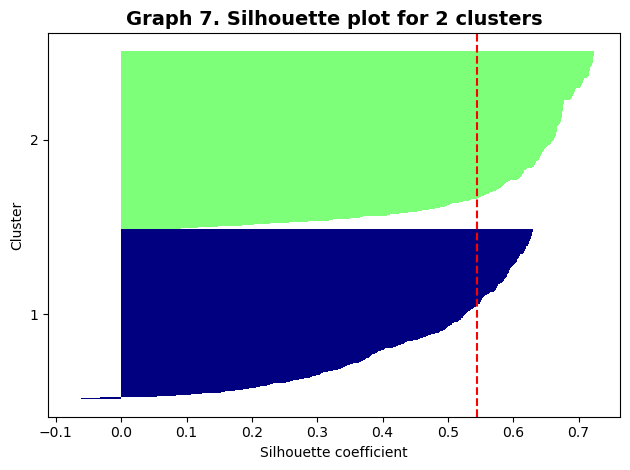

In [24]:
y_ax_lower, y_ax_upper = 0, 0
yticks = []

for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km3 == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
    
silhouette_avg = np.mean(silhouette_vals)
print(f'silhouette_avg: {silhouette_avg:.2f}')

plt.axvline(silhouette_avg, color="red", linestyle="--") # plot vertical average line

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

plt.title('Graph 7. Silhouette plot for 2 clusters', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig("Silhouette_plot2.png", bbox_inches='tight', dpi=300)
plt.show()

### Estimating the clusters

In [25]:
#Clustering dataset using k-means++
km_plus = KMeans(n_clusters=2, 
            init='k-means++',
            n_init=10,      
            max_iter=300, 
            random_state=0)

y_km_plus = km_plus.fit_predict(df1)

print(y_km_plus)
print(f'\nClusters:\n {km_plus.cluster_centers_}')

[0 1 1 ... 0 1 0]

Clusters:
 [[ 0.85641026  0.99282051  0.77758205  2.10358974  0.7781023   1.21538462
   1.63692308]
 [ 0.36487805  0.03219512 -0.73965122  0.84097561 -0.74014609  0.03902439
   0.0702439 ]]


In [26]:
#Clustering dataset using Agglomerative clustering
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters=2, 
                             metric='euclidean', 
                             linkage='complete')
agglomerative_labels  = ac.fit_predict(df1)
print('Cluster labels: %s' % agglomerative_labels )


Cluster labels: [0 1 1 ... 0 1 0]


In [27]:
#Adding clusters numbers as column to dataset
df_mapped['KMeans_Cluster'] = y_km_plus
df_mapped['Agglomerative_Cluster'] = agglomerative_labels 
df_mapped.head()

,Gender,Marital Status,Age,Education,Income,Occupation,Settlement Size,KMeans_Cluster,Agglomerative_Cluster
0,Female,Non-Single,39,University,130568,Skilled employee,Big city,0,0
1,Male,Single,29,High School,80315,Unemployed,Small city,1,1
2,Female,Single,35,Other,107067,Unemployed,Small city,1,1
3,Male,Non-Single,56,University,214000,Skilled employee,Small city,0,0
4,Female,Non-Single,45,University,158138,Skilled employee,Big city,0,0


### Identifying clusters

In [32]:
def create_cluster_summary(data, cluster_label):
    """
    This function creates a summary table for the clusters,
    including the most frequent categorical variables and 
    the mean of numerical variables, along with the count of customers in each cluster.
    """
    # Renaming categorical and numerical variables for clarity
    categorical_vars = ['Gender', 'Marital Status', 'Education', 'Settlement Size', 'Occupation']
    numerical_vars = ['Income', 'Age']
    
    # Calculating cluster centroids (mean of numeric variables)
    centroids = data.loc[:, numerical_vars + [cluster_label]].groupby(cluster_label).mean()
    
    # Determining the most frequent categorical features (mode) for each cluster
    dominant_features = data.loc[:, categorical_vars + [cluster_label]].groupby(cluster_label).agg(lambda x: x.mode().iloc[0])
    
    # Counting the number of customers in each cluster
    customer_distribution = data[cluster_label].value_counts().sort_index().rename('Customer Count')
    
    # Merging centroids, dominant features, and customer counts into one summary 
    cluster_summary = pd.concat([dominant_features, centroids, customer_distribution], axis=1)
    
    # Formatting Income with $, commas, and 2 decimal places, and Age with 2 decimal places
    cluster_summary['Income'] = cluster_summary['Income'].apply(lambda x: f"${x:,.2f}")
    cluster_summary['Age'] = cluster_summary['Age'].apply(lambda x: f"{x:.2f}")
    
    # Renaming cluster indices to make them more readable (Cluster 1, Cluster 2, etc.)
    cluster_summary.index = [f"Cluster {i+1}" for i in cluster_summary.index]
    
    return cluster_summary


### K-means++ clustering summary table

In [33]:
# Generating the cluster summary table for K-Means++
kmeans_summary = create_cluster_summary(df_mapped, 'KMeans_Cluster')
print('\033[1m' + 'Table 3. K-Means++ cluster summary' + '\033[0m')
kmeans_summary

Table 3. K-Means++ cluster summary


,Gender,Marital Status,Education,Settlement Size,Occupation,Income,Age,Customer Count
Cluster 1,Female,Non-Single,University,Big city,Skilled employee,"$173,460.69",48.18,976
Cluster 2,Male,Single,High School,Small city,Unemployed,"$103,256.60",33.81,1024


### Agglomerative clustering summary table

In [34]:
# Generating the cluster summary table for Agglomerative clustering
agg_clustering_summary = create_cluster_summary(df_mapped, 'Agglomerative_Cluster')
print('\033[1m' + 'Table 4. Agglomerative clustering summary' + '\033[0m')

agg_clustering_summary


Table 4. Agglomerative clustering summary


,Gender,Marital Status,Education,Settlement Size,Occupation,Income,Age,Customer Count
Cluster 1,Female,Non-Single,University,Big city,Skilled employee,"$168,085.08",47.08,1163
Cluster 2,Male,Single,High School,Small city,Unemployed,"$95,041.15",32.13,837
